<a href="https://colab.research.google.com/github/dexlau/cs6460/blob/master/statistical_literacy_codelab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 1: Introduction to Data Manipulation and Visualization in R

This interactive codelab will introduce you to some basic statistical literacy concepts. The [end goal](https://drive.google.com/open?id=1-Ca41jDsUxPyVt32n9qvPF6_nJK86-Ru) is to give you a sense of how to apply statistical concepts into practical data science solutions for your next school assignment or work project.

*Prerequisite: To get the most out of this course, a basic knowledge of statistical functions (e.g. mean, median, mode) is required.*

**Running this codelab**: To run this Colab notebook, you'll be asked to `Connect` (top right). When you do, Colab will ask you to acknowledge that it is okay to use the IRKernel (open source version of R from GitHub). Select `RUN ANYWAY` to continue.
![warning message](https://i.imgur.com/RWtiOr0.png)

## Curriculum

1.   An introduction to R (data types and structures)
1.   Illustrating a basic test set (e.g. mtcars)
1.   Plotting the data set
1.   Manipulating data - aggregating without grouping
1.   Manipulating data - aggregating with grouping
1.   Plotting aggregate data groups
1.   Outliers - demonstrating how some data can skew results
1.   Modeling - illustrating a regression
1.   Confidence Intervals - demonstrate how data is subject to certainty
1.   New data - revisit the above with a new data set from user



## Introduction

Before we can start manipulating and visualizing data, we have to get a sense of what shapes data can come in. Similar to how shapes can be described as rectangles, circles, or stars, data comes in a few common types. These data types in R include:
*   character: 'a', 'abc' (quotation marks to indicate the characters)
*   numeric: 2, 15.5
*   integer: 2L (like numeric, but the 'L' indicates we don't want fractions)
*   logical: TRUE, FALSE
*   complex: 1+2i (complex numbers with real and imaginary parts)

### Data type examples
Print a few examples of data types.

In [1]:
# Store and print example data types.
data_type_example_1 <- 'a'
data_type_example_2 <- 15.5
data_type_example_3 <- 2L
data_type_example_4 <- TRUE
data_type_example_5 <- 1+2i
print(paste(data_type_example_1,'is',class(data_type_example_1)))
print(paste(data_type_example_2,'is',class(data_type_example_2)))
print(paste(data_type_example_3,'is',class(data_type_example_3)))
print(paste(data_type_example_4,'is',class(data_type_example_4)))
print(paste(data_type_example_5,'is',class(data_type_example_5)))

[1] "a is character"
[1] "15.5 is numeric"
[1] "2 is integer"
[1] "TRUE is logical"
[1] "1+2i is complex"


### Data type identifier
Try entering a value into `data_type_example` (to the right) and see what data type it corresponds to by pressing the 'Play' button on the left (or `ctrl-shift-enter`).

For `character` data types, surround your input with quotation marks to avoid the `Error in eval(expr, envir, enclos)` error.

In [2]:
# Try entering values to see their data types.
data_type_example <- 'a' #@param {type:"raw"}
print(class(data_type_example))

[1] "character"


### Storing values
To keep data around, we need to assign it to a variable. This is done using the assignment operator, `<-`. Below, we assign `'Fido'` to `my_dogs_name`.

In [3]:
my_dogs_name <- 'Fido'
print(my_dogs_name)

[1] "Fido"


### Lists of values
One piece of data alone isn't too helpful. We can group some similar data together using `c()`, which groups a set of one type of data together.

In [4]:
your_dogs_name <- 'Fluffy'
our_dogs_names <- c(my_dogs_name, your_dogs_name)
print(our_dogs_names)

[1] "Fido"   "Fluffy"


### Data frames of values

We can go a step further and combine groups of data together. This dense representation of data is called a `data frame`. This is analogous to a spreadsheet or table. Let's attach some ages to our dogs and save it as `dog_table`.

In [5]:
dog_table <- data.frame("name" = our_dogs_names, "age_in_human_years" = c(2,5))
print(dog_table)

    name age_in_human_years
1   Fido                  2
2 Fluffy                  5


## Test Data

Let's load up some test data for us to play with. `mtcars` is a `data.frame` with car characteristics and mileage. To get a sense of what the data looks like, we can use `str()`.

In [6]:
data(mtcars)
str(mtcars)  # Describe the columns, data types, sample values, and table size.


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


To build an intuition about that data, we can explore some useful summary statistics using the `summary()` function. It provides the minimum value, maximum value, quartile values, and mean values of each column of data. From the 32 cars in this [1973–1974 data set](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html), we can see the average `mpg` is `20.09`.

In [7]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

## Plotting the Data

Rather than presenting large amounts of data as a table or summary statistics, we can visualize it using plots (AKA charts). This makes reading data easier.

### Histogram

A simple histogram can give us a sense of how many cars have a given `mpg` value. With one visual, we can see that most cars have an `mpg` near `20`, but cars with much higher or lower `mpg` values are less common.


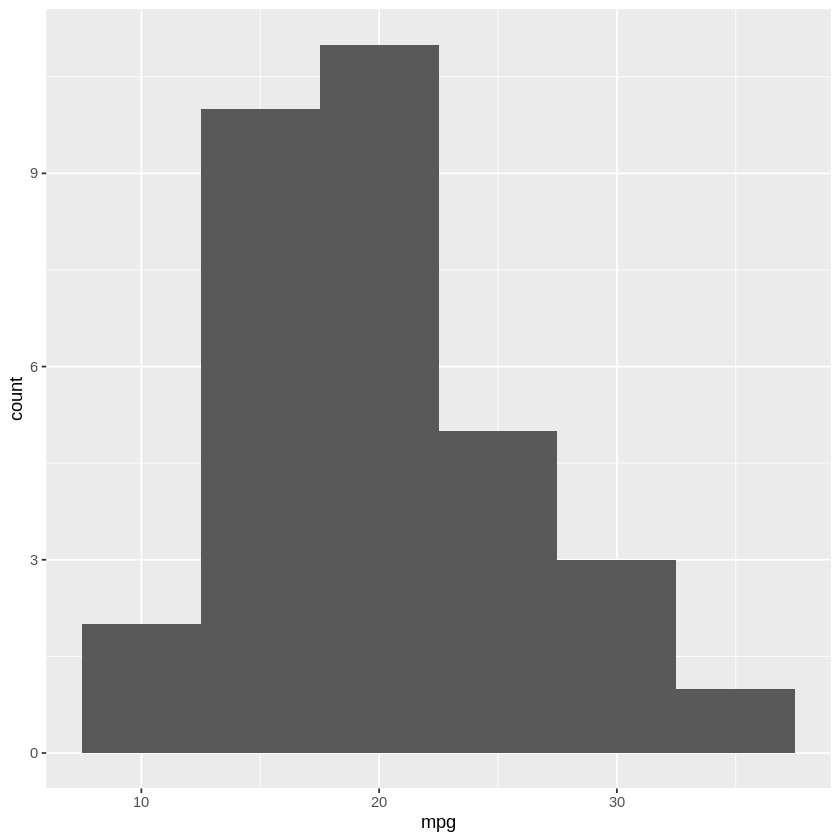

In [8]:
suppressMessages(
  library(ggplot2))  # A helpful library for plotting data easily.
ggplot(mtcars,aes(x=mpg)) +  # Create a new plot.
  geom_histogram(binwidth=5)  # Add a histogram to the plot, grouping mpg by 5.

### Scatter plot

Representing the data with different plots using different columns of data helps us show interesting relationships. For example, showing `mpg` versus `wt` (weight) succinctly describes how two values relate to each other. In this case, heavier cars have lower `mpg` values.

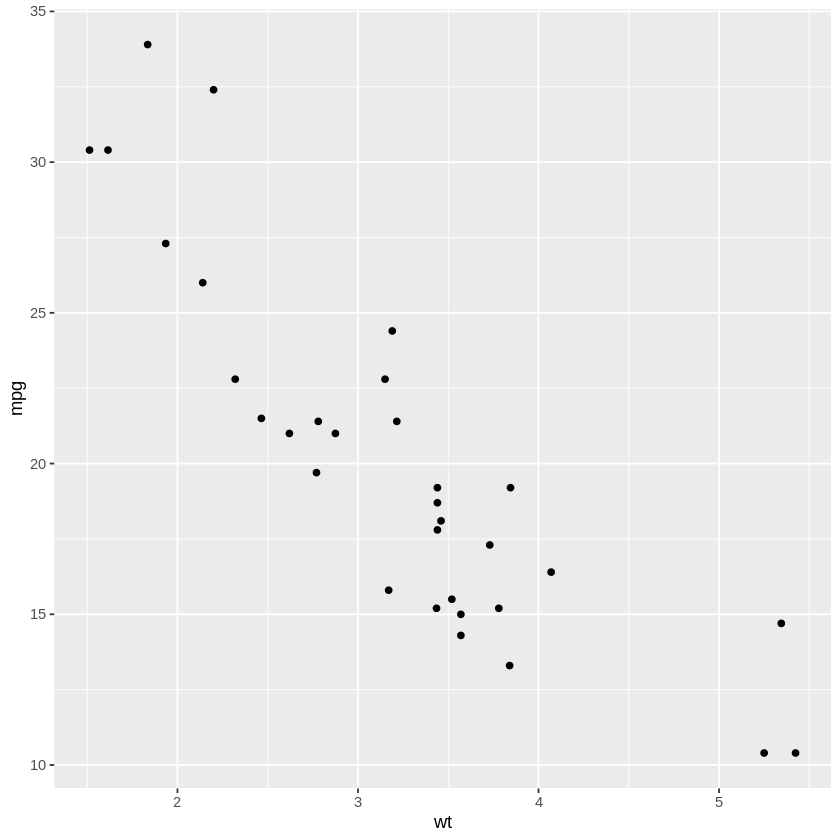

In [9]:
ggplot(mtcars,aes(x=wt,y=mpg)) + geom_point()

## Manipulating data - Aggregating Without Grouping

While `summary()` is useful to show common statistics, it might not have the an aggregation you are curious about. We can use another [built in stats function](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/00Index.html) like `var()` to compute variance for the `mpg` column.

Here we use a handy package called `dplyr` ([documentation](https://dplyr.tidyverse.org/)) to make data manipulation easier. Starting with a dataset, you can sequentially apply data manipulation commands using `%>%`.

In [10]:
suppressMessages(library(dplyr))  # A helpful package for manipulating data.
mpg_var <- mtcars %>%
  summarise_each(
    mpg,
    funs=list(var)) %>%  # Apply `var()` to each column.
  as_tibble()
print(mpg_var)

# A tibble: 1 x 1
    mpg
  <dbl>
1  36.3


## Manipulating data - Aggregating With Grouping

Overall statistics can too general. We can instead group certain data together and compute their statistics independently. For example, we can look at the mean `mpg` for cars based on the number of cylinders they have.

In [11]:
mpg_stats <- mtcars %>%
  group_by(cyl) %>%  # Separate data into groups based on cylinder count.
  summarise_each(
    mpg,  # Indicate the column we want to summarize.
    funs=funs(mean_mpg=mean)) %>%  # Calculate mean for each group.
  as_tibble()
print(mpg_stats)

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”

# A tibble: 3 x 2
    cyl mean_mpg
  <dbl>    <dbl>
1     4     26.7
2     6     19.7
3     8     15.1


## Plotting Aggregations

Numbers are easier to compare when they are visualized. Let's plot `mpg_stats` using bar charts to illustrate the difference in `mpg` by `cyl`.

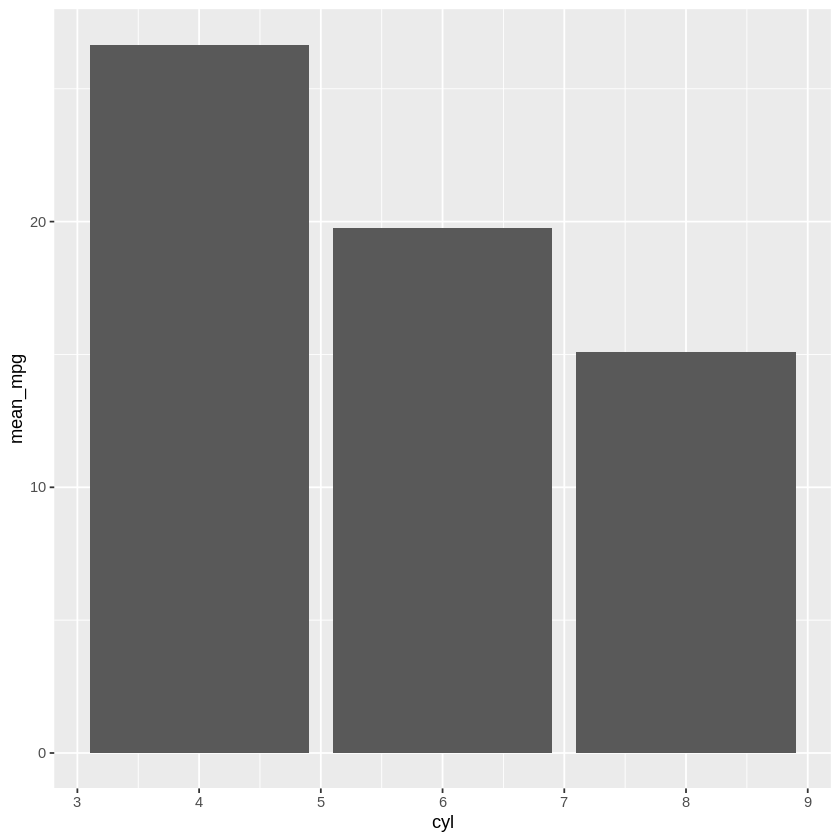

In [12]:
ggplot(mpg_stats, aes(x=cyl,y=mean_mpg)) +
  geom_bar(stat='identity')  # 'identity' indicate values are the bar heights.

## Plotting Outliers
This hides how varied `mpg` values are for each `cyl` group. We can represent this better by showing the distribution of each data point using different plots. Here we use a violin plot and dot plot.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


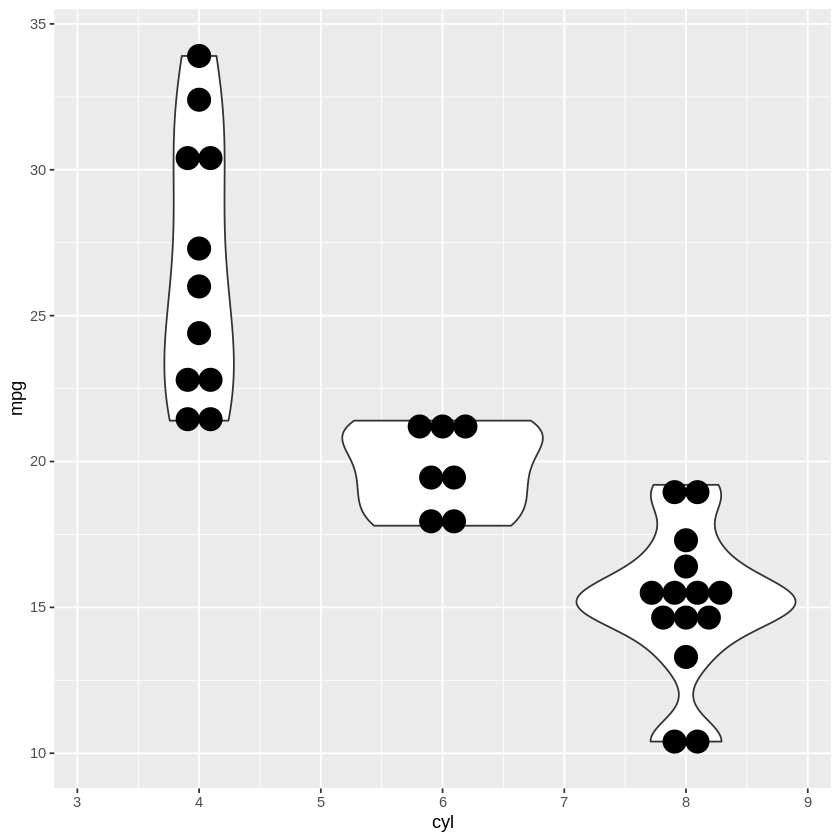

In [13]:
ggplot(mtcars, aes(x=cyl, y=mpg, group=cyl)) +
  geom_violin() +  # Draw the shape of the distribution for each group.
  geom_dotplot(binaxis='y', stackdir='center', dotsize=1) # Draw each point.

## Modeling
After exploring the data through plots and aggregate functions, we can start generalizing our understanding of various relationships. For example, we saw as `wt` increases, `mpg` decreases. We can approximate that relationship with a linear model, `lm`.

In [14]:
summary(lm(mpg ~ wt, mtcars))$coef  # Summarize the `mpg` ~ `wt` relationship. 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),37.285126,1.877627,19.857575,8.241799e-19
wt,-5.344472,0.559101,-9.559044,1.293959e-10


Looking at the [p-value](https://en.wikipedia.org/wiki/P-value), we can see the `mpg` and `wt` relationship is significant. For every 1000 pounds of weight, `mpg` drops by `5.344472`. The intercept indicates a hypothetical weightless car's `mpg` of `37.285126`.

We can plot this linear model out on top of our data points for `mpg` and `wt` to see this correlation better.

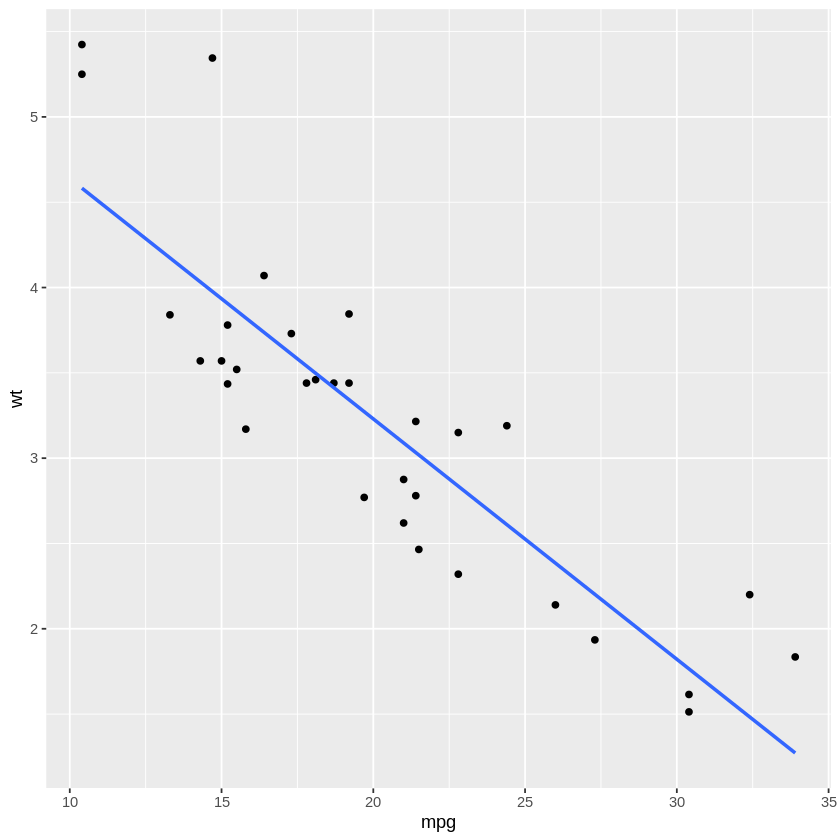

In [15]:
ggplot(mtcars, aes(mpg, wt)) +
  geom_point() +
  geom_smooth(method = "lm", se=FALSE)

## Confidence Intervals
In the linear model above, we generalized a relationship with just a single value (e.g. `5.344472` loss in `mpg` for each 1000 pounds in `wt`). This can be misleading, and can be better represented using a range of values where we are fairly certain the true value lies.

Let's revisit the problem above using `am`: the indicator of an automatic or manual transmission.

In [16]:
summary(lm(mpg ~ am, mtcars))$coef  # Summarize the `mpg` ~ `am` relationship. 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),17.147368,1.124603,15.247492,1.133983e-15
am,7.244939,1.764422,4.106127,2.850207e-04


At face value, `mpg` decreases by `7.244939` for automatic cars. We can instead represent this difference in `mpg` using a range of values using a [t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) to define a 95% confidence interval -- the range in which we are 95% certain the true value lies. 

In [17]:
t.test(  # Do a t-test comparing
  mtcars[mtcars$am == 1,]$mpg,  # the `mpg` of cars using an auto transmission
  mtcars[mtcars$am == 0,]$mpg)  # the `mpg` of cars using a manual transmission


	Welch Two Sample t-test

data:  mtcars[mtcars$am == 1, ]$mpg and mtcars[mtcars$am == 0, ]$mpg
t = 3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  3.209684 11.280194
sample estimates:
mean of x mean of y 
 24.39231  17.14737 


Here we can see the mean `mpg` for manual cars is `24.39231` compared to `17.14737` for automatic cars, and we are 95% confident the difference in `mpg` is between `3.209684` and `11.280194`. The estimate of `7.244939` above fits snuggly in the middle of this range.

# Unit 2: Querying Data

Now that we have the basics, let's learn how to access data from various sources used by most data practitioners such as databases and data files.

## Databases

Most modern systems store data in database tables, highly efficient storage structures that allow for very fast access for extremely large data sets. In this section, we'll try querying data from a test database, `mammals`.

In [0]:
#@title Setup 'mammals' database (~5 minutes to run)
install.packages(c("dbplyr", "RSQLite"))
library(dplyr)
library(dbplyr)
dir.create("data_raw", showWarnings = FALSE)
download.file(url = "https://ndownloader.figshare.com/files/2292171",
              destfile = "data_raw/portal_mammals.sqlite", mode = "wb")
mammals <- DBI::dbConnect(RSQLite::SQLite(), "data_raw/portal_mammals.sqlite")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘bit’, ‘bit64’, ‘blob’



### Query Everything

The most basic query is simply pulling _everything_ from a table. Here we do this, but just get the first `10` rows using the `LIMIT` keyword.

In [0]:
# Use the tbl() command in conjunction with a database source ('mammals' here)
# and your query (represented by `sql_query_1`)
sql_query_1 <- sql("SELECT * FROM surveys")
tbl(mammals, sql_query_1)

The `SELECT` statement above indicates which fields (columns) of data you want to pull. `FROM` indicates which table you are querying. Together, the two statements succinctly indicate you are selecting _all_ fields (indicated by `SELECT *`) from the `surveys` table.

### Query Using `dplyr`

This lesson won't get into SQL too deeply. Please check out tutorials such as [W3Schools](https://www.w3schools.com/sql/) to learn more. Instead, we'll rely on `dplyr` (described [above](#scrollTo=Z3U9VAdiZATB)) to navigate our database table.

Below, let's get all the mammals with `weight < 5`, pulling their `species_id, sex, weight`.

In [0]:
# Store the `surveys` table as a dataframe that we can access like above
surveys <- tbl(mammals, "surveys") %>% as.data.frame
surveys %>%
  filter(weight < 5) %>%
  select(species_id, sex, weight)

Now that you have a data frame loaded into `df`, try all of the above using the skills your learned before!

## Comma Separated Values (CSVs)

Sample data is good to learn, but let's try pulling data from your own data source. Data typically lives in giant database table, but it can sometimes live as tabular data in CSV files.

Below is input recording Trik or Treaters by time. Try replacing `raw_data` with your own data. Copy from your own spreadsheet (including the header row) and paste it into `raw_input`.

In [0]:
# Copy from a spreadsheet of your choice (with the header row).
# Paste it between the quotes brackets below.
raw_input <- '
Time	guests
17:45	3
17:50	4
18:00	1
18:16	2
18:27	2
18:28	1
18:38	5
18:44	8
18:47	2
18:48	5
18:49	1
19:00	6
19:04	2
19:18	4
19:29	3
19:31	2
19:37	1
19:43	3
19:45	2
19:49	6
19:54	2
19:57	2
19:59	1
20:04	3
20:06	2
20:11	1
20:15	4
20:22	2
20:30	6
20:53	4'

df <- read.table(text=raw_input, sep="\t", header=TRUE)
print(df)

# Unit 3: Exercises & Solutions

Let's put it all together by reproducing `Unit 1` examples on the real data we started querying from `Unit 2` (i.e. `surveys`).

## Exercises

In [0]:
#@title Exercise 1
# Describe the columns, data types, sample values, and table size.

In [0]:
#@title Exercise 2
# List summary statistics for all fields.

In [0]:
#@title Exercise 3
# Plot a histogram of hindfoot_length.

In [0]:
#@title Exercise 4
# Filter `surveys` on values where hindfoot_length is greater than 0.

In [0]:
#@title Exercise 5
# Plot a histogram of `surveys` on values where hindfoot_length are
# greater than 0.

In [0]:
#@title Exercise 6
# Get the average weight.
# Hint: you may need to filter out weights that don't exist
# (i.e. where weight <= 0).

In [0]:
#@title Exercise 7
# Get the average weight by sex.

In [0]:
#@title Exercise 8
# Plot the average weight by sex as a histogram.

In [0]:
#@title Exercise 9
# Plot a boxplot of weight by sex.

In [0]:
#@title Exercise 10
# Model the relationship between weight and hindfoot_length using a
# linear regression, identifying the coefficient.

In [0]:
#@title Exercise 11
# Plot the relationship between weight and hindfoot_length using a
# linear regression.

In [0]:
#@title Exercise 12
# Use a t-test to determine the difference in weight between males
# and females. How much heavier are males 95% of the time?

## Solutions

In [0]:
#@title Solution 1
str(surveys)

In [0]:
#@title Solution 2
summary(surveys)

In [0]:
#@title Solution 3
ggplot(surveys,aes(x=hindfoot_length)) +  # Create a new plot.
  geom_histogram()  # Add a histogram to the plot, grouping mpg by 5.

In [0]:
#@title Solution 4
surveys %>% filter(hindfoot_length > 0)

In [0]:
#@title Solution 5
ggplot(surveys %>% filter(hindfoot_length > 0),aes(x=hindfoot_length)) +
  geom_histogram()

In [0]:
#@title Solution 6
surveys %>%
  filter(weight > 0) %>%  # Filter out weights <= 0.
  summarise_each(
    weight,  # Indicate the column we want to summarize.
    funs=list(mean_weight=mean))  # Indicate `mean` as the aggregator.

In [0]:
#@title Solution 7
surveys %>%
  filter(weight > 0) %>%  # Filter out weights <= 0.
  group_by(sex) %>%  # Separate data into groups based on sex.
  summarise_each(
    weight,  # Indicate the column we want to summarize.
    funs=list(mean_weight=mean))  # Indicate `mean` as the aggregator.

In [0]:
#@title Solution 8
weight_stats <- surveys %>%
  filter(weight > 0) %>%  # Filter out weights <= 0.
  group_by(sex) %>%  # Separate data into groups based on sex.
  summarise_each(
    weight,  # Indicate the column we want to summarize.
    funs=list(mean_weight=mean))  # Indicate `mean` as the aggregator.

ggplot(weight_stats, aes(x=sex,y=mean_weight)) +
  geom_bar(stat='identity')  # 'identity' indicate values are the bar heights.

In [0]:
#@title Solution 9
ggplot(surveys, aes(x=sex, y=weight)) +
  geom_boxplot() 

In [0]:
#@title Solution 10
summary(lm(weight ~ hindfoot_length, surveys))$coef

In [0]:
#@title Solution 11
ggplot(surveys, aes(weight, hindfoot_length)) +
  geom_point() +
  geom_smooth(method = "lm", se=FALSE)

In [0]:
#@title Solution 12
t.test(  # Do a t-test comparing
  surveys[surveys$sex == 'M',]$weight,  # the `weight` of males
  surveys[surveys$sex == 'F',]$weight)  # the `weight' of females

# Males are between [0.02552529, 1.62412287] pounds heavier 95%
# of the time.